In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import data_wrangling as dw
import typing

In [2]:
df = dw.ds_read('pollution')
df.head()

Using file name: "pollution.csv" to transform the data


,city,year,month,day,CO,NO2,O3,SO2
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15
4,Cincinnati,2012,1,5,0.345,21.0,0.016,11.05


In [3]:
city_filter_str = 'Houston'

df_houston = df.query(f"city == {city_filter_str!r}")
df_houston.year.value_counts()

2012    366
2013    365
2014    364
2015    338
Name: year, dtype: int64

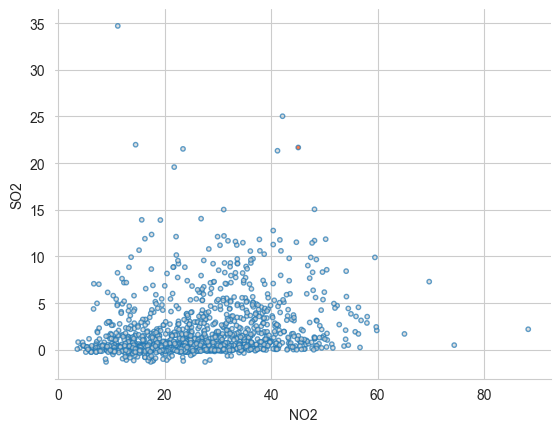

In [4]:
houston_color_list = ['orangered' if (d == 330) & (y == 2014) else 'lightgray' for d,y in zip(df_houston.day, df_houston.year)]


sns.set_style('whitegrid')
g = sns.regplot(x='NO2', y='SO2', data=df_houston,
            fit_reg=False, marker='o',
            scatter_kws={'facecolor':houston_color_list, 'alpha':0.7, 's':10})
sns.despine(left=True)

In [5]:
def highlight_max(data: pd.DataFrame, xy_col_list: list, max_col_name: str):
    
    max_value = np.max(data[max_col_name].values)
    data['point_type'] = [f'Hightest {max_col_name} point' if i == max_value else 'Others' for i in data[max_col_name].values]

    g = sns.scatterplot(x=xy_col_list[0], y=xy_col_list[1], data=data,
                        hue='point_type', alpha=0.8, palette=['lightgray', 'orangered'])
    plt.show()

/Users/lucaslee/.pyenv/versions/miniconda3-4.7.12/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


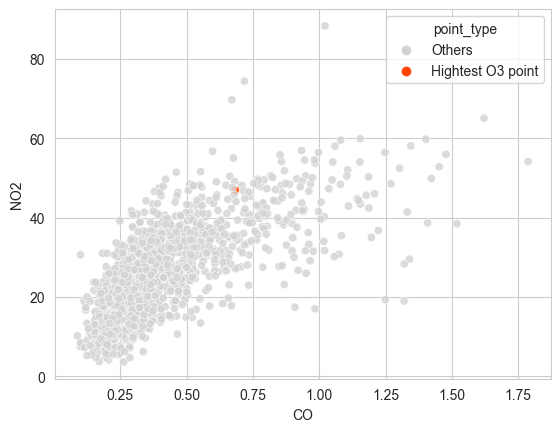

In [6]:
highlight_max(df_houston, ['CO', 'NO2'], 'O3')

4035    22.95
Name: NO2, dtype: float64 4035    0.21825
Name: CO, dtype: float64


Text(10, 1, 'Testing the data')

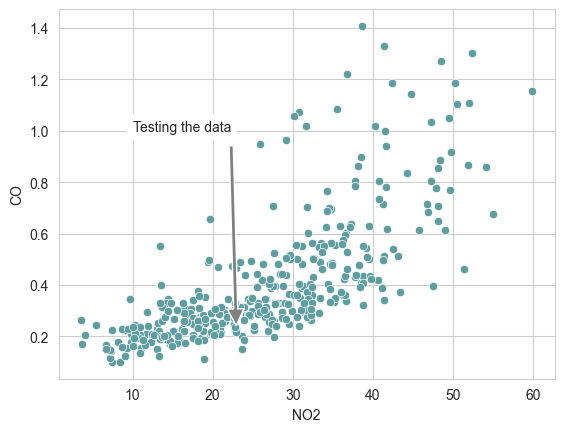

In [7]:
# 2012-12-01

target_data = df_houston.query("year == 2012 and month == 12 and day == 336").sort_values(['month', 'day'])
print(target_data.NO2, target_data.CO)

sns.scatterplot(x='NO2', y='CO', data=df_houston[df_houston['year'] == 2012],
                color='cadetblue')

plt.annotate('Testing the data', 
             xy=(target_data.NO2, target_data.CO), xytext=(10, 1),
             arrowprops = {'facecolor':'gray', 'width': 3, 'shrink': 0.03},
             backgroundcolor = 'white')



In [8]:
df_houston

,city,year,month,day,CO,NO2,O3,SO2,point_type
3700,Houston,2012,1,1,0.25000,19.10,0.0300,0.100,Others
3701,Houston,2012,1,2,0.50000,39.50,0.0310,0.850,Others
3702,Houston,2012,1,3,0.48000,34.65,0.0365,8.225,Others
3703,Houston,2012,1,4,0.91550,49.75,0.0260,5.375,Others
3704,Houston,2012,1,5,0.70825,48.15,0.0250,15.050,Others
...,...,...,...,...,...,...,...,...,...
5128,Houston,2015,12,361,0.20100,7.90,0.0230,-0.150,Others
5129,Houston,2015,12,362,0.30050,12.70,0.0200,-0.050,Others
5130,Houston,2015,12,363,0.35250,20.20,0.0140,0.650,Others
5131,Houston,2015,12,364,0.29750,9.80,0.0140,-0.050,Others


In [9]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
